# 预测新图像

使用训练好的图像分类模型，对新图像文件进行预测。

同济子豪兄：https://space.bilibili.com/1900783

[代码运行云GPU环境](https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1)：GPU RTX 3060、CUDA v11.2

## 导入工具包

In [1]:
import torch
import torchvision
import torch.nn.functional as F

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
device

device(type='cuda', index=0)

## 设置matplotlib中文字体

In [3]:
# windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [ ]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体


--2023-03-26 18:11:54--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  19.0MB/s    用时 0.5s    

2023-03-26 18:11:55 (19.0 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



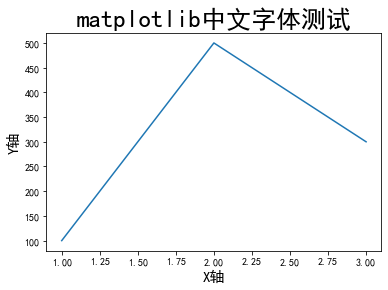

In [4]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 导入pillow中文字体

In [6]:
from PIL import Image, ImageFont, ImageDraw
# 导入中文字体，指定字号
font = ImageFont.truetype('SimHei.ttf', 32)

## 载入类别

In [7]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()

In [8]:
idx_to_labels

{0: 'O', 1: 'R'}

## 导入训练好的模型

In [9]:
model = torch.load('checkpoint/gar_cla.pth')
model = model.eval().to(device)

## 预处理

In [10]:
from torchvision import transforms
# 测试集图像预处理-RCTN：缩放、裁剪、转 Tensor、归一化
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

## 载入一张测试图像

In [11]:
from PIL import Image

In [12]:
img_path = 'test_img/test.jpg'
# img_path = 'test_img/banana1.jpg'
# img_path = 'test_img/test_bananan.jpg'
# img_path = 'test_img/test_orange.jpg'
# img_path = 'test_img/test_orange_2.jpg'
# img_path = 'test_img/test_kiwi.jpg'
# img_path = 'test_img/test_lemon.jpg'
# img_path = 'test_img/test_石榴.jpg'
# img_path = 'test_img/test_火龙果.jpg'

In [13]:
img_pil = Image.open(img_path)

In [14]:
np.array(img_pil).shape

(234, 310, 3)

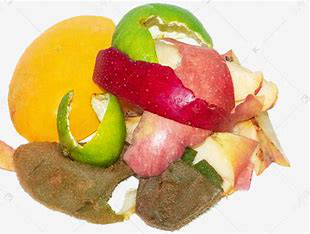

In [15]:
img_pil

## 预处理、前向预测

In [16]:
input_img = test_transform(img_pil) # 预处理

In [17]:
input_img.shape

torch.Size([3, 224, 224])

In [18]:
input_img = input_img.unsqueeze(0).to(device)

In [19]:
input_img.shape

torch.Size([1, 3, 224, 224])

In [20]:
# 执行前向预测，得到所有类别的 logit 预测分数
pred_logits = model(input_img) 

In [21]:
pred_logits

tensor([[ 4.3142, -6.1850]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [22]:
pred_softmax = F.softmax(pred_logits, dim=1) # 对 logit 分数做 softmax 运算

In [23]:
pred_softmax

tensor([[9.9997e-01, 2.7559e-05]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [48]:
!conda update matplotlib

Channels:
 - defaults
 - nvidia
 - pytorch
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

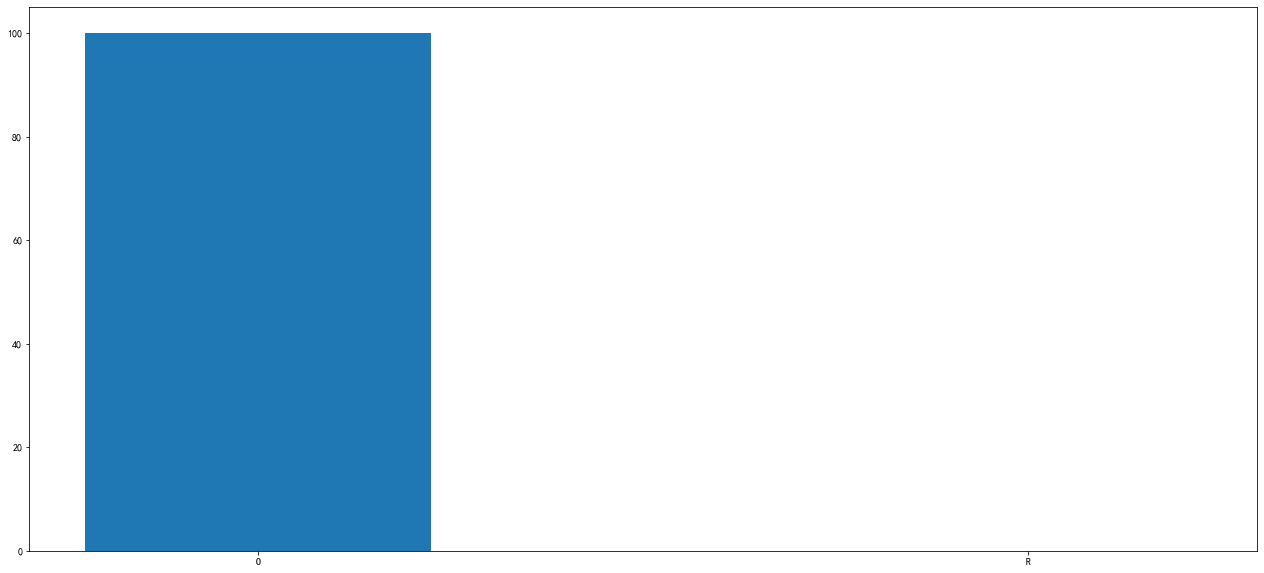

In [49]:
plt.figure(figsize=(22, 10))

x = idx_to_labels.values()
y = pred_softmax.cpu().detach().numpy()[0] * 100
width = 0.45 # 柱状图宽度

ax = plt.bar(x, y, width)

plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值
plt.tick_params(labelsize=20) # 设置坐标文字大小

plt.title(img_path, fontsize=30)
plt.xticks(rotation=45) # 横轴文字旋转
plt.xlabel('类别', fontsize=20)
plt.ylabel('置信度', fontsize=20)
plt.show()

## 置信度最大的前 n 个结果

In [50]:
n = 2
top_n = torch.topk(pred_softmax, n) # 取置信度最大的 n 个结果
pred_ids = top_n[1].cpu().detach().numpy().squeeze() # 解析出类别
confs = top_n[0].cpu().detach().numpy().squeeze() # 解析出置信度

In [51]:
pred_ids

array([0, 1], dtype=int64)

In [52]:
confs

array([9.9997246e-01, 2.7559046e-05], dtype=float32)

## 图像分类结果写在原图上

In [53]:
draw = ImageDraw.Draw(img_pil)

In [54]:
for i in range(n):
    class_name = idx_to_labels[pred_ids[i]] # 获取类别名称
    confidence = confs[i] * 100 # 获取置信度
    text = '{:<15} {:>.4f}'.format(class_name, confidence) # 保留 4 位小数
    print(text)
    
    # 文字坐标，中文字符串，字体，rgba颜色
    draw.text((50, 100 + 50 * i), text, font=font, fill=(255, 0, 0, 1))

O               99.9972
R               0.0028


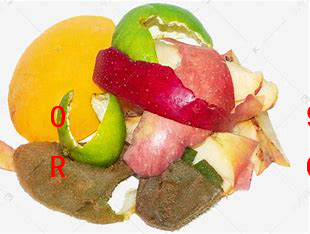

In [55]:
img_pil

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

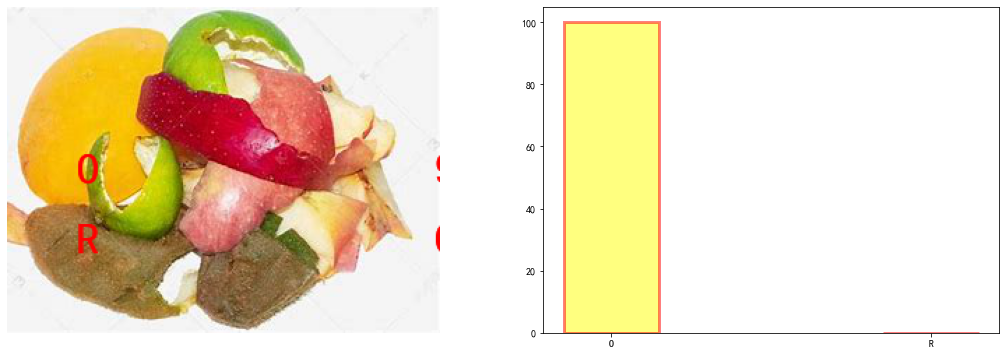

In [56]:
fig = plt.figure(figsize=(18,6))

# 绘制左图-预测图
ax1 = plt.subplot(1,2,1)
ax1.imshow(img_pil)
ax1.axis('off')

# 绘制右图-柱状图
ax2 = plt.subplot(1,2,2)
x = idx_to_labels.values()
y = pred_softmax.cpu().detach().numpy()[0] * 100
ax2.bar(x, y, alpha=0.5, width=0.3, color='yellow', edgecolor='red', lw=3)
plt.bar_label(ax, fmt='%.2f', fontsize=10) # 置信度数值

plt.title('{} 图像分类预测结果'.format(img_path), fontsize=30)
plt.xlabel('类别', fontsize=20)
plt.ylabel('置信度', fontsize=20)
plt.ylim([0, 110]) # y轴取值范围
ax2.tick_params(labelsize=16) # 坐标文字大小
plt.xticks(rotation=90) # 横轴文字旋转

plt.tight_layout()
fig.savefig('output/预测图+柱状图.jpg')

### 预测结果表格输出

In [57]:
pred_df = pd.DataFrame() # 预测结果表格
for i in range(n):
    class_name = idx_to_labels[pred_ids[i]] # 获取类别名称
    label_idx = int(pred_ids[i]) # 获取类别号
    confidence = confs[i] * 100 # 获取置信度
    pred_df = pred_df.append({'Class':class_name, 'Class_ID':label_idx, 'Confidence(%)':confidence}, ignore_index=True) # 预测结果表格添加一行
display(pred_df) # 展示预测结果表格

,Class,Class_ID,Confidence(%)
0,O,0.0,99.997246
1,R,1.0,0.002756


## 参考文档

https://www.bilibili.com/video/BV1qe4y1D7zD